In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2016-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2016_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6900,북구,8500,북구,1600,23.19%,"7,700"
1,2016-01-07,간장,오복왕표 0.9ℓ 1병,4950,북구,6550,북구,1600,32.32%,"5,750"
2,2016-01-07,고등어,30㎝정도 500g 1마리,2250,북구,4261,북구,2011,89.38%,"3,256"
3,2016-01-07,달걀,오경슈퍼란60g정도 10개,2700,북구,2900,북구,200,7.41%,"2,800"
4,2016-01-07,닭고기,육계 1.0㎏,7250,북구,7520,북구,270,3.72%,"7,385"
5,2016-01-07,대파,1.0㎏,3400,북구,4210,북구,810,23.82%,"3,805"
6,2016-01-07,돼지고기,삼겹살 500g,11000,북구,11400,북구,400,3.64%,"11,200"
7,2016-01-07,두부,500g 판두부(국산포장두부 420g) 1모,3200,북구,4200,북구,1000,31.25%,"3,700"
8,2016-01-07,라면,신라면 120g 1봉지,630,북구,634,북구,4,0.63%,632
9,2016-01-07,맥주,하이트 500㎖ 1병,1260,북구,1350,북구,90,7.14%,"1,305"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2016-04-14"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2016_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-04-14,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5400,북구,6675,북구,1275,23.61%,"6,038"
1,2016-04-14,간장,오복왕표 0.9ℓ 1병,4950,북구,6550,북구,1600,32.32%,"5,750"
2,2016-04-14,고등어,30㎝정도 500g 1마리,3900,북구,4000,북구,100,2.56%,"3,950"
3,2016-04-14,달걀,오경슈퍼란60g정도 10개,2700,북구,2900,북구,200,7.41%,"2,800"
4,2016-04-14,닭고기,육계 1.0㎏,6830,북구,9500,북구,2670,39.09%,"8,165"
5,2016-04-14,대파,1.0㎏,2780,북구,4970,북구,2190,78.78%,"3,875"
6,2016-04-14,돼지고기,삼겹살 500g,8600,북구,9400,북구,800,9.3%,"9,000"
7,2016-04-14,두부,500g 판두부(국산포장두부 420g) 1모,3250,북구,4365,북구,1115,34.31%,"3,808"
8,2016-04-14,라면,신라면 120g 1봉지,630,북구,630,북구,0,0.0%,630
9,2016-04-14,맥주,하이트 500㎖ 1병,1260,북구,1350,북구,90,7.14%,"1,305"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2016-07-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2016_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-07-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6900,북구,8175,북구,1275,18.48%,"7,538"
1,2016-07-07,간장,오복왕표 0.9ℓ 1병,4750,북구,6550,북구,1800,37.89%,"5,650"
2,2016-07-07,고등어,30㎝정도 500g 1마리,4800,북구,4900,북구,100,2.08%,"4,850"
3,2016-07-07,달걀,오경슈퍼란60g정도 10개,2700,북구,2730,북구,30,1.11%,"2,715"
4,2016-07-07,닭고기,육계 1.0㎏,8076,북구,8100,북구,24,0.3%,"8,088"
5,2016-07-07,대파,1.0㎏,1980,북구,3542,북구,1562,78.89%,"2,761"
6,2016-07-07,돼지고기,삼겹살 500g,10000,북구,12900,북구,2900,29.0%,"11,450"
7,2016-07-07,두부,500g 판두부(국산포장두부 420g) 1모,3250,북구,4365,북구,1115,34.31%,"3,808"
8,2016-07-07,라면,신라면 120g 1봉지,600,북구,630,북구,30,5.0%,615
9,2016-07-07,맥주,하이트 500㎖ 1병,1190,북구,1350,북구,160,13.45%,"1,270"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2016-10-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2016_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2016-10-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,북구,6900,북구,225,3.37%,"6,788"
1,2016-10-13,간장,오복왕표 0.9ℓ 1병,4750,북구,6550,북구,1800,37.89%,"5,650"
2,2016-10-13,고등어,30㎝정도 500g 1마리,2300,북구,4250,북구,1950,84.78%,"3,275"
3,2016-10-13,달걀,오경슈퍼란60g정도 10개,2700,북구,2850,북구,150,5.56%,"2,775"
4,2016-10-13,닭고기,육계 1.0㎏,8850,북구,10800,북구,1950,22.03%,"9,825"
5,2016-10-13,대파,1.0㎏,2500,북구,3828,북구,1328,53.12%,"3,164"
6,2016-10-13,돼지고기,삼겹살 500g,9750,북구,10900,북구,1150,11.79%,"10,325"
7,2016-10-13,두부,500g 판두부(국산포장두부 420g) 1모,3280,북구,4365,북구,1085,33.08%,"3,823"
8,2016-10-13,라면,신라면 120g 1봉지,630,북구,650,북구,20,3.17%,640
9,2016-10-13,맥주,하이트 500㎖ 1병,1190,북구,1350,북구,160,13.45%,"1,270"


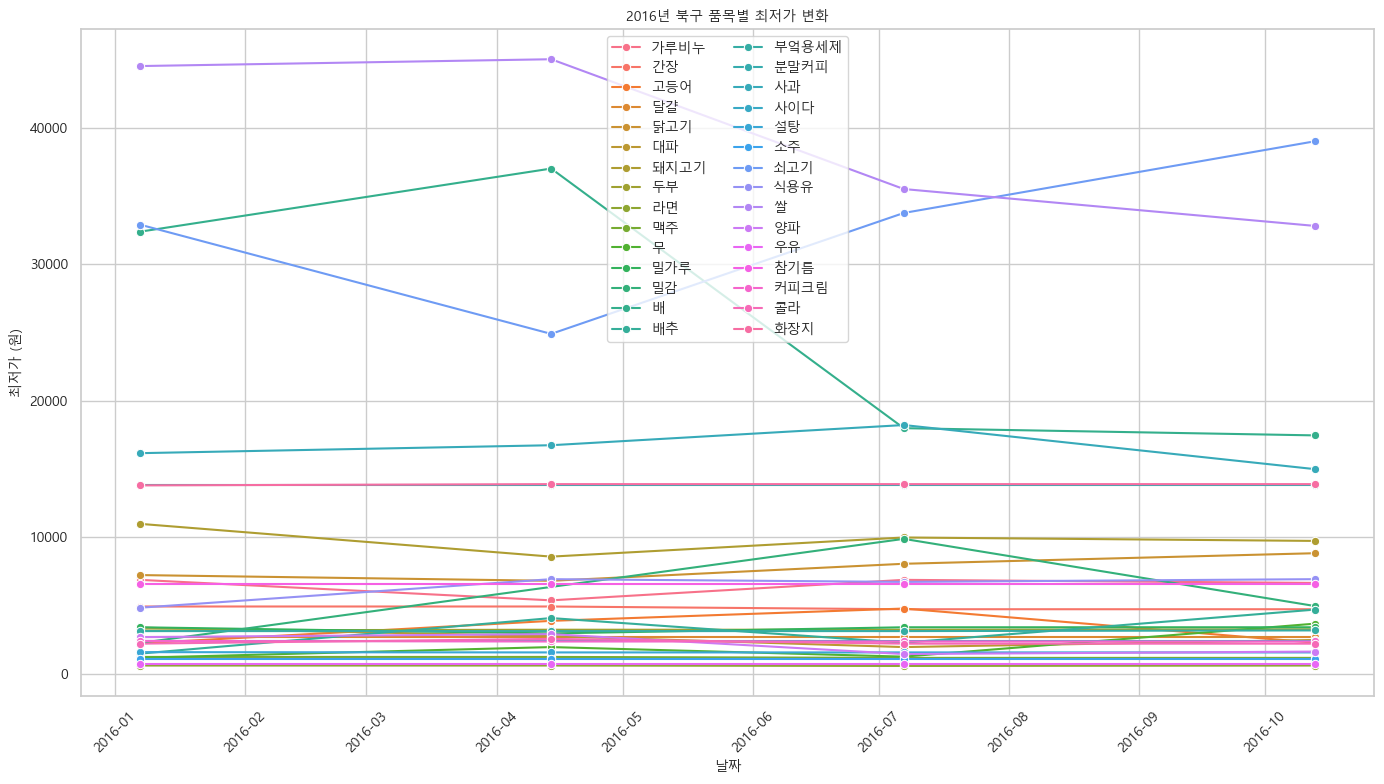

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2016_1q.csv")
q2 = pd.read_csv("북구2016_2q.csv")
q3 = pd.read_csv("북구2016_3q.csv")
q4 = pd.read_csv("북구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 북구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("북구2016_min.csv", index=False, encoding="utf-8-sig")

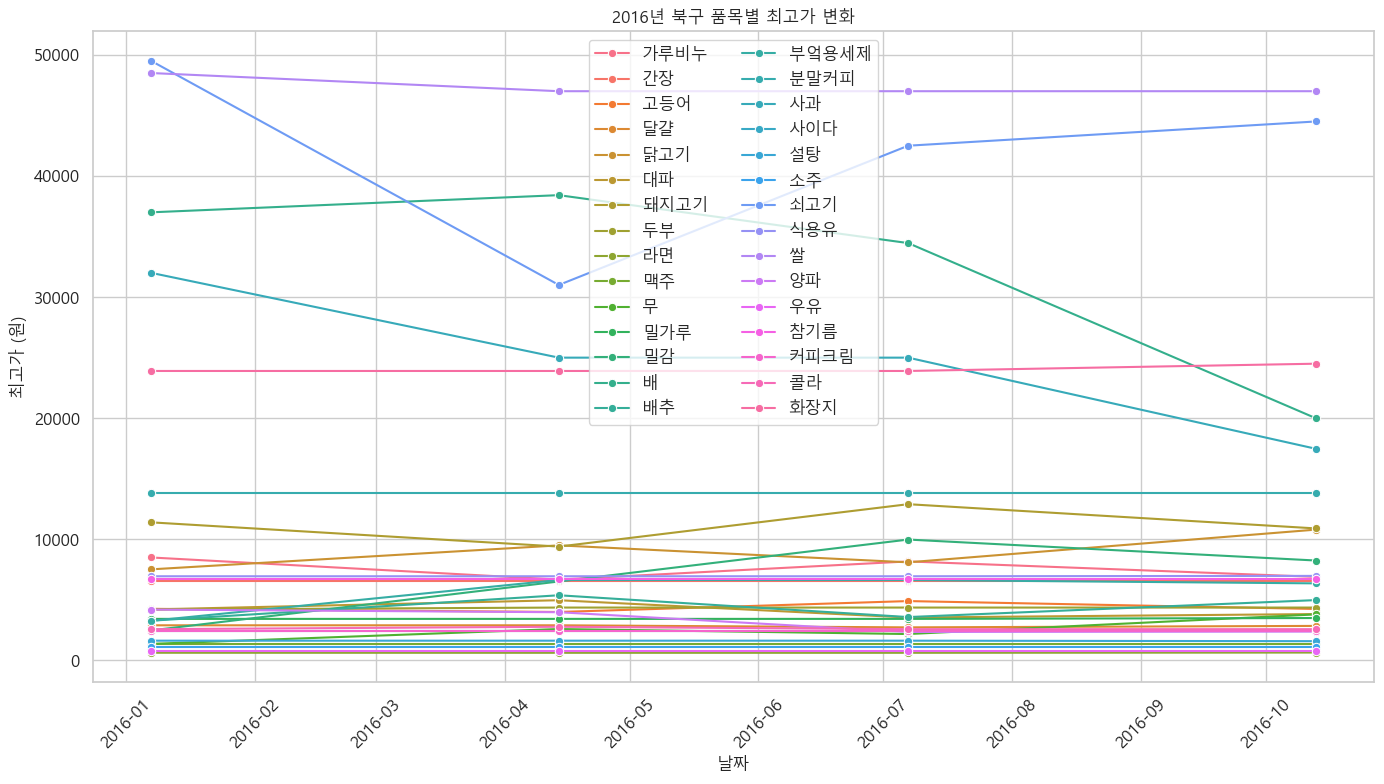

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2016_1q.csv")
q2 = pd.read_csv("북구2016_2q.csv")
q3 = pd.read_csv("북구2016_3q.csv")
q4 = pd.read_csv("북구2016_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2016년 북구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("북구2016_max.csv", index=False, encoding="utf-8-sig")